In [1]:
# load data from tsp file
import numpy as np

tsp_data = np.loadtxt('C:\Halim\ISEN_2022-2023\Enseignement_S2\M1\metaheuristics\TSPDataset\gr17.2085.tsp')
print(tsp_data.shape)

(17, 17)


In [2]:
import math


def initial_solution(length):
    s = np.random.choice(range(length), length, replace=False) #cities in [0,16]
    return s
    

def objectivefunction(s):
    cost = 0
    for i in range(s.shape[0]-1):
        cost = cost + tsp_data[s[i]][s[i+1]]
    
    cost = cost + tsp_data[s[-1]][s[0]]
    return cost
            

def generate_all_neighbors(s):
    neighbors_list = []
    tmp_s = np.copy(s)
    for i in range(s.shape[0]-1):
        for j in range(i+1,s.shape[0]):
            tmp_s[i],tmp_s[j] = tmp_s[j],tmp_s[i] # swap values located at these indices
            neighbors_list.append(tmp_s)
            tmp_s = np.copy(s)     
    return np.asarray(neighbors_list)

  
def get_best_neighbor(s):
    
    neighbors_list = generate_all_neighbors(s)
    costs = map(lambda x: objectivefunction(x), neighbors_list)
    array_costs = np.array(list(costs))
    best_index = np.argmin(array_costs)
    return neighbors_list[best_index], array_costs[best_index]





In [9]:
import matplotlib.pyplot as plt


costs_hist = []

# random initial solution and its cost
s = initial_solution(17) #np.random.choice(range(17), 17, replace=False) #cities in [0,16]
cost_s = objectivefunction(s)

# save history of costs
costs_hist.append(cost_s)

# consider solution s as the best solution for now
best_s = np.copy(s) # hard copy
best_cost = cost_s
    
while True:
    neighbor, cost_neighbor = get_best_neighbor(np.copy(s))
    #print('s{} neighb{} s{} neighb{}'.format(cost_s,cost_neighbor, s, neighbor))
    if(cost_neighbor < cost_s):
        s= np.copy(neighbor)
        cost_s = cost_neighbor
        best_s = s
        best_cost = cost_s
        costs_hist.append(cost_s)
    else:
        #print('out')
        break
        
    

    
print ('best sol, cost {} {}'.format(best_s,best_cost))

best sol, cost [ 8 11 15  0  6  7  5 16 13  2 10  4  1  9 14 12  3] 2177.0


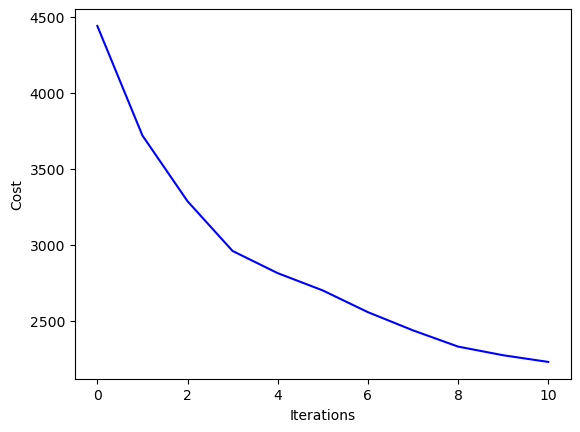

In [6]:
import matplotlib.pyplot as plt

plt.plot(costs_hist, 'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

C:\Users\halim.benhabiles\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\halim.benhabiles\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


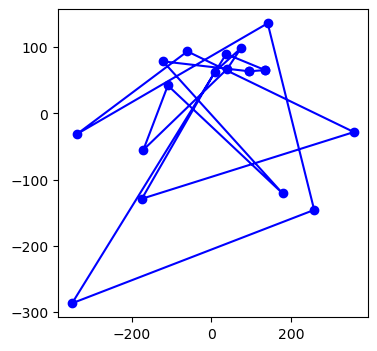

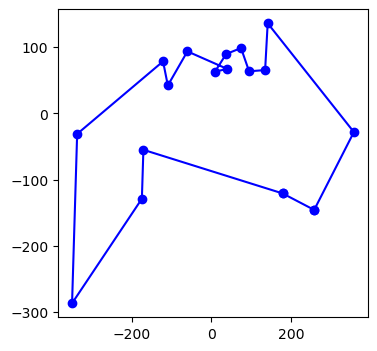

In [139]:
# convert distance matrix between cities into coordinates of cities 
from sklearn import manifold  # multidimensional scaling

length = 17
mds_model = manifold.MDS(n_components=2, random_state=length,
                             dissimilarity='precomputed')
mds_fit = mds_model.fit(tsp_data)
mds_coords = mds_model.fit_transform(tsp_data)

# plot a random solution over cities
s = initial_solution(length)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(mds_coords[s, 0], mds_coords[s, 1], 'b-o')
plt.plot([mds_coords[s[0], 0], mds_coords[s[-1], 0]],
         [mds_coords[s[0], 1], mds_coords[s[-1], 1]], 'b-o')


# plot the best solution over cities
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(mds_coords[best_s, 0], mds_coords[best_s, 1], 'b-o')
plt.plot([mds_coords[best_s[0], 0], mds_coords[best_s[-1], 0]],
         [mds_coords[best_s[0], 1], mds_coords[best_s[-1], 1]], 'b-o')